<h1>IBM Advance Data Science Capstone Project </h1>

In this capstone project, My aim is to explore breast cancer dataset. The features of the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. <br>
<b>This data analysis is useful to predict the breast cancer cells in human body.</b>

<h2>Import Required Libraries</h2>

In [1]:
# import data wrangling and visual libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns; sns.set() # used for plot interactive graph. I like it most for plot
%matplotlib inline

# to check the dircteory


<h2>Loading Data</h2>

In [2]:
# # Read Field Names File and Show Top 2 Records
# with open('../Data/field_names.txt', 'r') as the_file:
#     col_names = [line.strip() for line in the_file.readlines()]
# print(col_names, '\n')

# Read Data File and Show Top 2 Records
data = pd.read_csv("datasets/breast-cancer.csv",sep=",")
data.head(2)

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [3]:
# # set Column Names and display top 3 records
columns = ['ID', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'radius_sd_error', 'radius_worst', 'texture_sd_error', 'perimeter_sd_error', 'area_sd_error',  'smoothness_sd_error',  'compactness_sd_error', 'concavity_sd_error', 'concave_points_sd_error', 'symmetry_sd_error', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 
# print(data.head(3))  
# # to see last 3 records
# print(data.tail(3))  
x=pd.DataFrame(columns=columns)

In [4]:
#list of column names that match with Mean
mean_cols = [col for col in x.columns if '_mean' in col]
print(mean_cols,'\n')

#list of column names that match with SD
sd_cols = [col for col in x.columns if '_sd' in col]
print(sd_cols, '\n')

#list of column names that match with Mean
worst_cols = [col for col in x.columns if '_worst' in col]

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_sd_error', 'texture_sd_error', 'perimeter_sd_error', 'area_sd_error', 'smoothness_sd_error', 'compactness_sd_error', 'concavity_sd_error', 'concave_points_sd_error', 'symmetry_sd_error', 'fractal_dimension_sd_error'] 



In [5]:
data=data.drop(labels='Unnamed: 32',axis=1)

In [6]:
data.columns=['ID','diagnosis']+mean_cols+sd_cols+worst_cols

In [7]:
data.head(3) 


,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
data.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h1> Data Wrangling </h1>

We have successfully loaded data. Now lets look at the type of data we have.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
texture_mean                  569 non-null float64
perimeter_mean                569 non-null float64
area_mean                     569 non-null float64
smoothness_mean               569 non-null float64
compactness_mean              569 non-null float64
concavity_mean                569 non-null float64
concave_points_mean           569 non-null float64
symmetry_mean                 569 non-null float64
fractal_dimension_mean        569 non-null float64
radius_sd_error               569 non-null float64
texture_sd_error              569 non-null float64
perimeter_sd_error            569 non-null float64
area_sd_error                 569 non-null float64
smoothness_sd_error           569 non-null float64
compactness_sd_error          5

So we have 569 records against 32 columns and all of them have 569 non-null records and the data type is float64.

Lets keep the Diagnosis data and drop ID and diagnosis columns as they are not needed

In [10]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['ID','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remaining features are representing the 3 computations (Mean, Standard Deviation Error and Worst) against single feautre.
Lets group them into 3 categories.

In [11]:
#list of column names that match with Mean
mean_cols = [col for col in x.columns if '_mean' in col]
print(mean_cols,'\n')

#list of column names that match with SD
sd_cols = [col for col in x.columns if '_sd' in col]
print(mean_cols, '\n')

#list of column names that match with Mean
worst_cols = [col for col in x.columns if '_worst' in col]
print(mean_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


Before moving forward to the data analysis of features. Lets have a quick look of the labels we are going to predict

Number of Benign:  357
Number of Malignant :  212


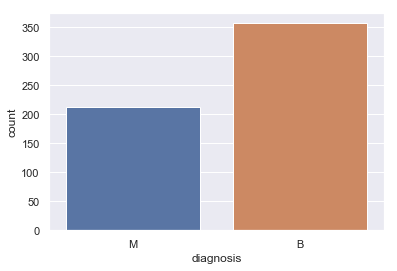

In [12]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

What we must know is the distribution of data like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand the data, how normally distributed it is, or it has skewed distribution.

In [13]:
data.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The summary statistics helps us to understand is we need standirdization or normalization before visualization, feature selection or classificaiton.

Before moving to Exploratory Analysis, lets develop a function to generate bootstrap samples.

<h1> Visualization</h1>
    
For data visualization, we are going to use seaborn plots. 
Histgram , Scatter , Violin and finaly heatmap plots usually helps us to understand data easily.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53C636400>,
      dtype=object)

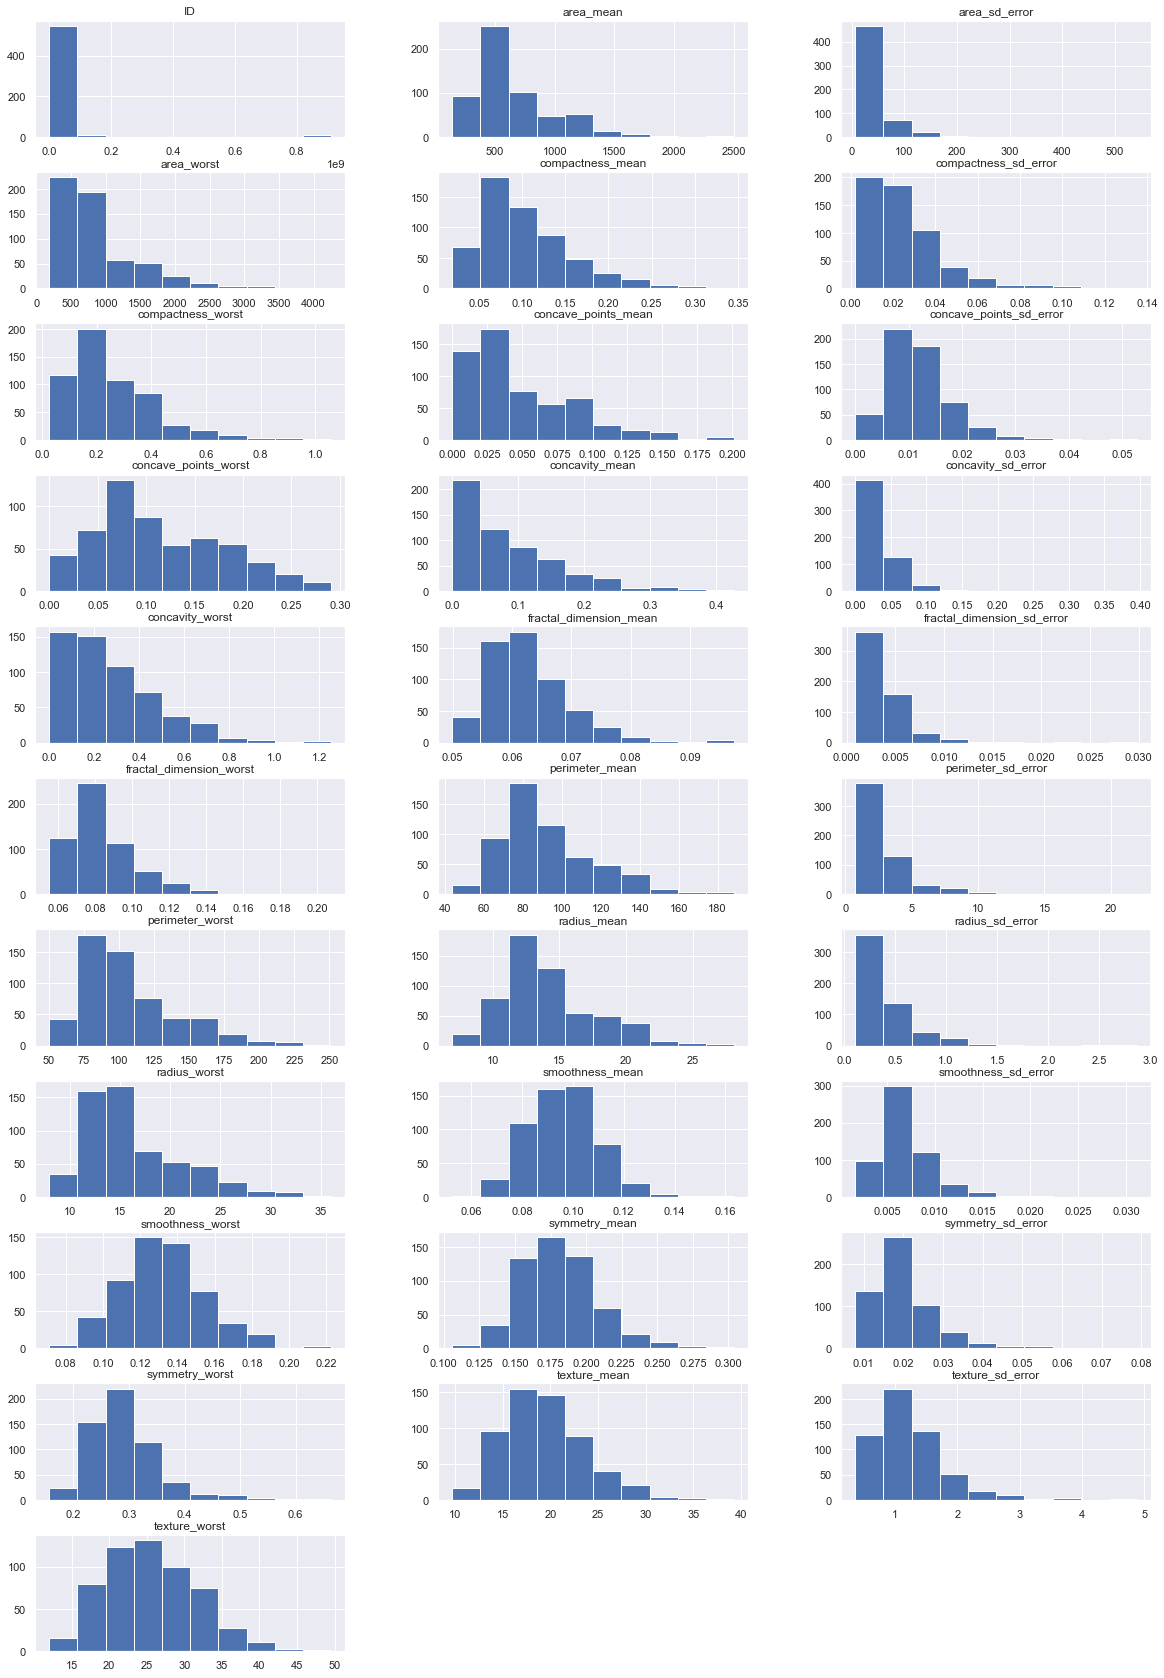

In [14]:
data.hist(figsize=(20, 30), layout=(11,3),bins=10)

Now, we know the distribution for each feature on data we can know is a normal distribution or skewness.

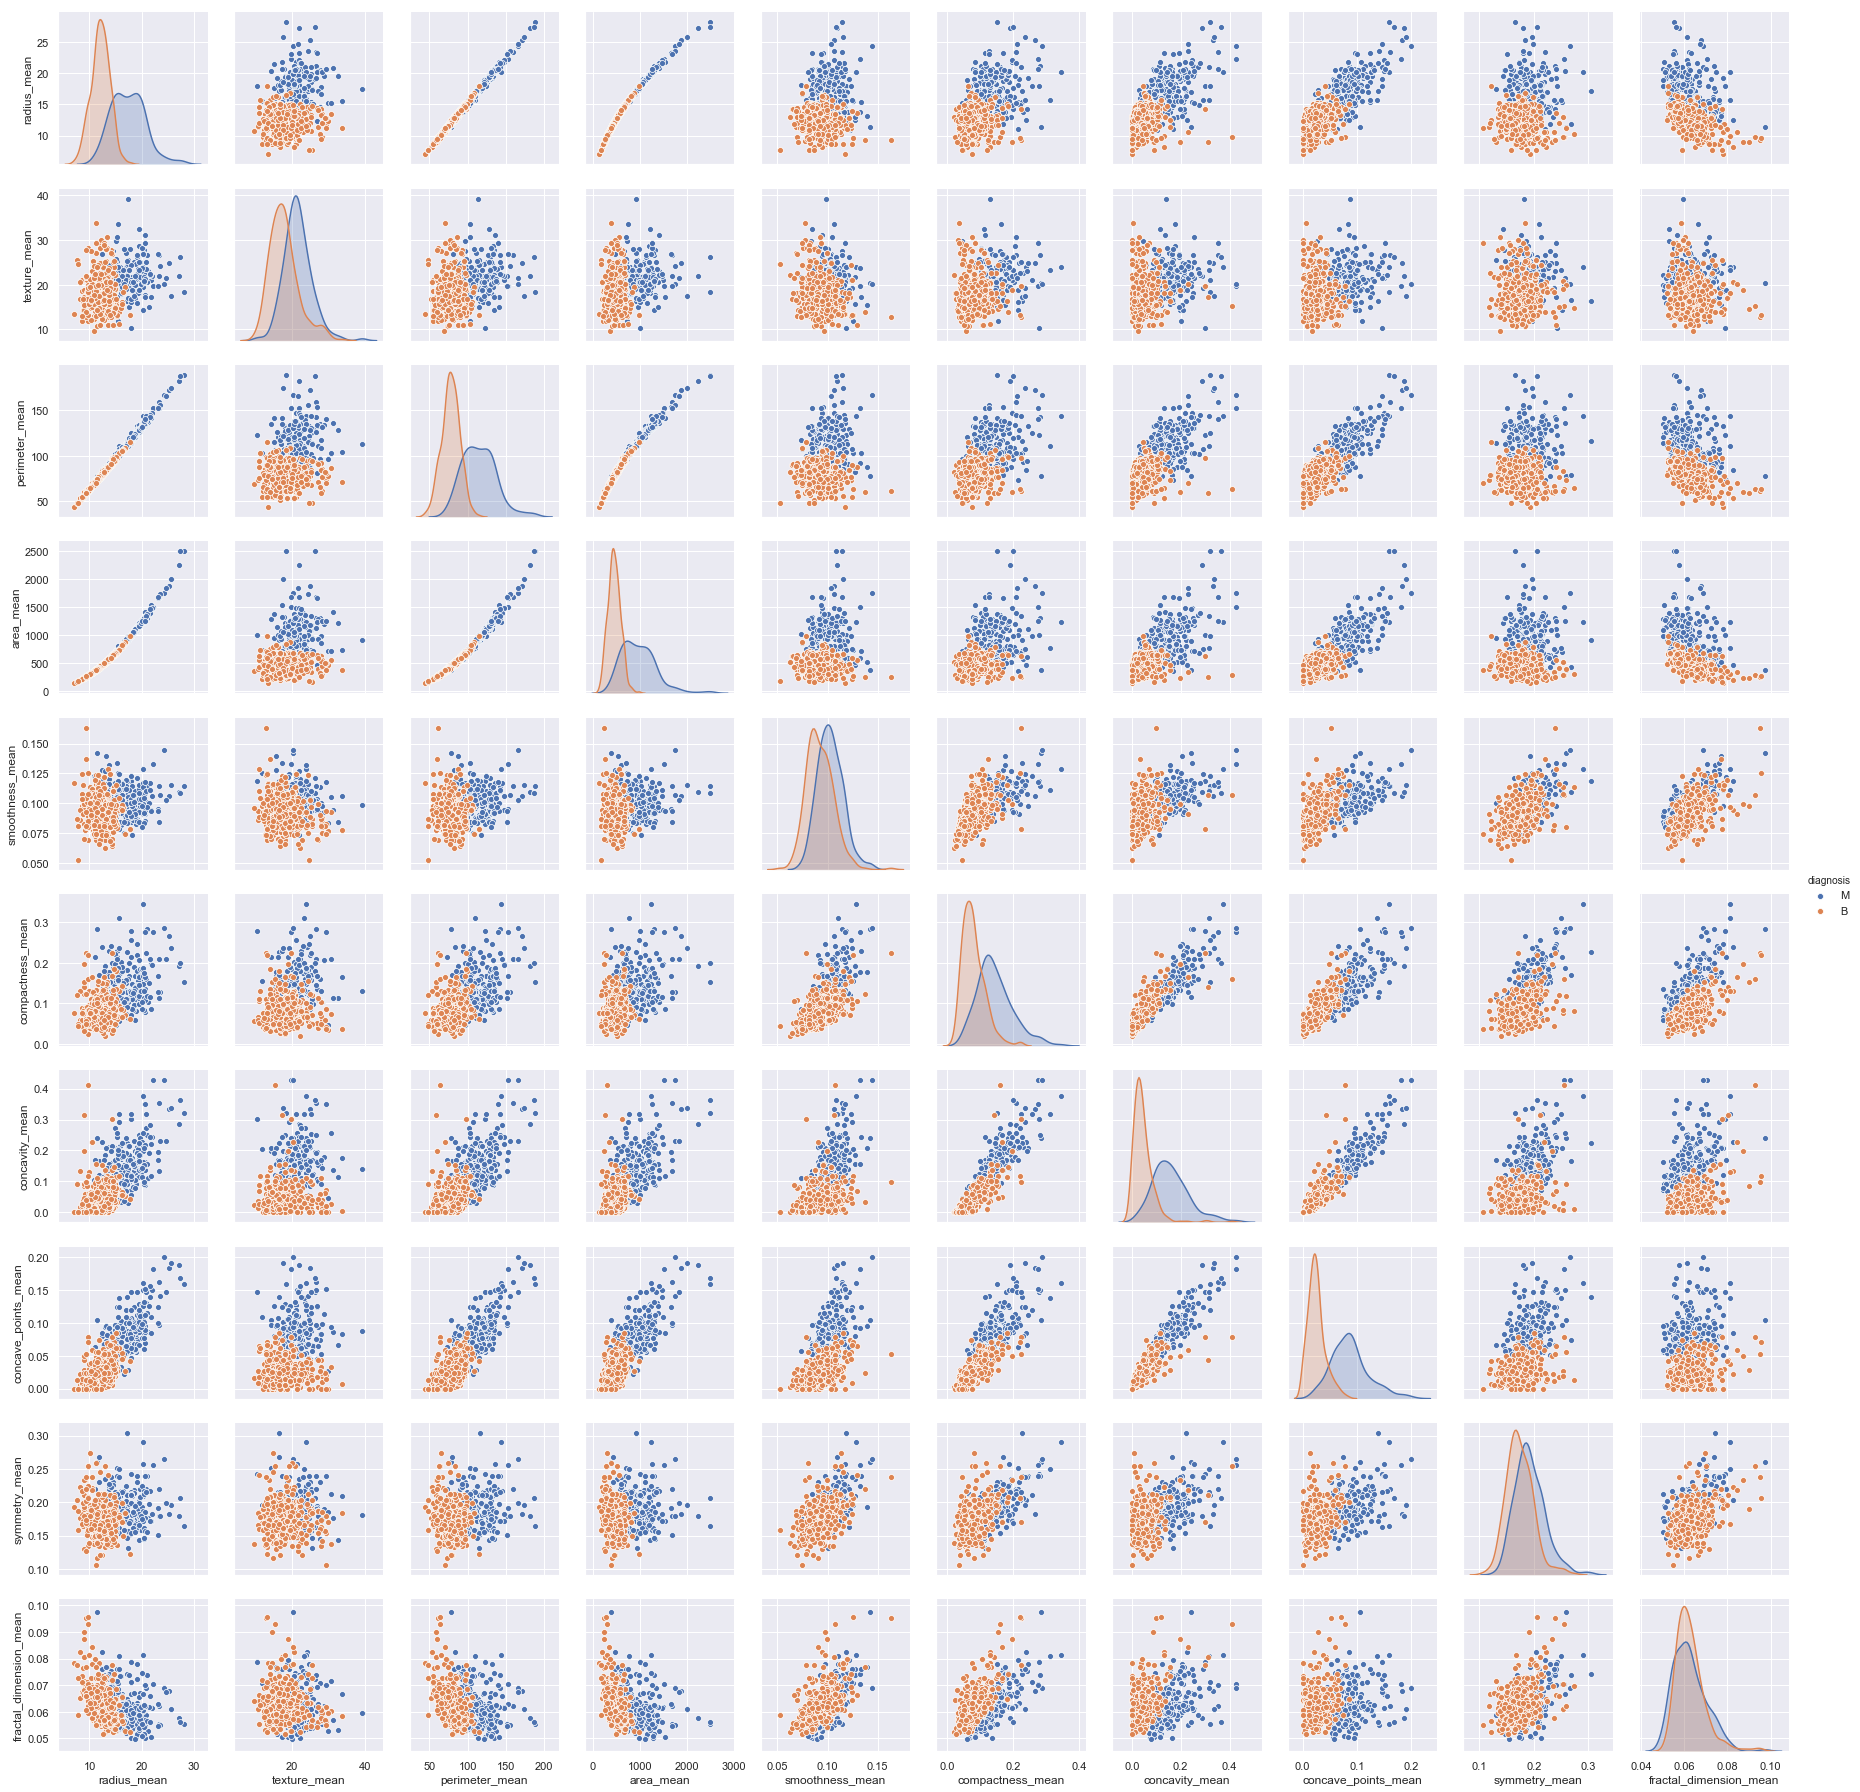

In [15]:
from pandas.plotting import scatter_matrix

sns.pairplot(data.iloc[:,1:12], hue='diagnosis')

Based on the previous plot can know the correlation between features.

In [16]:
data.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We need to perform normalization/standirdization of data. Because differences between values of features are very high to observe in plot

In [17]:
data = x
data_nor= (data - data.mean()) / (data.std())   # standardization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

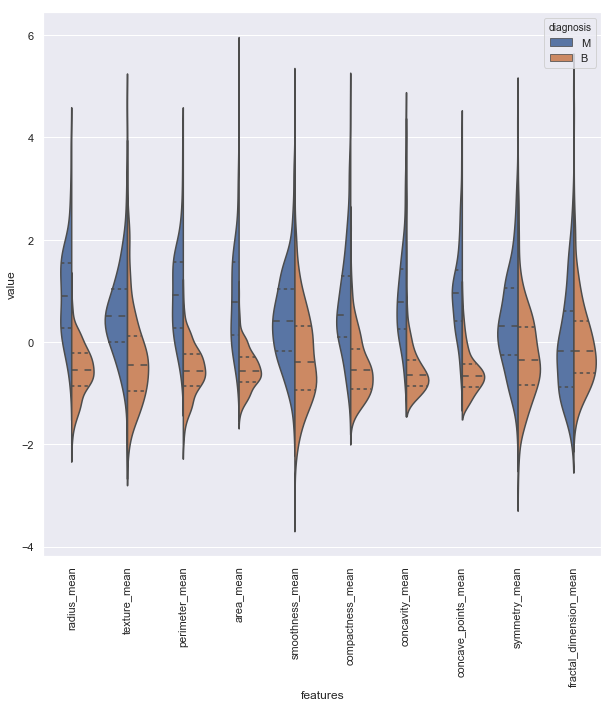

In [18]:
# All mean features
data_diag = y        
data = pd.concat([y,data_nor[mean_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

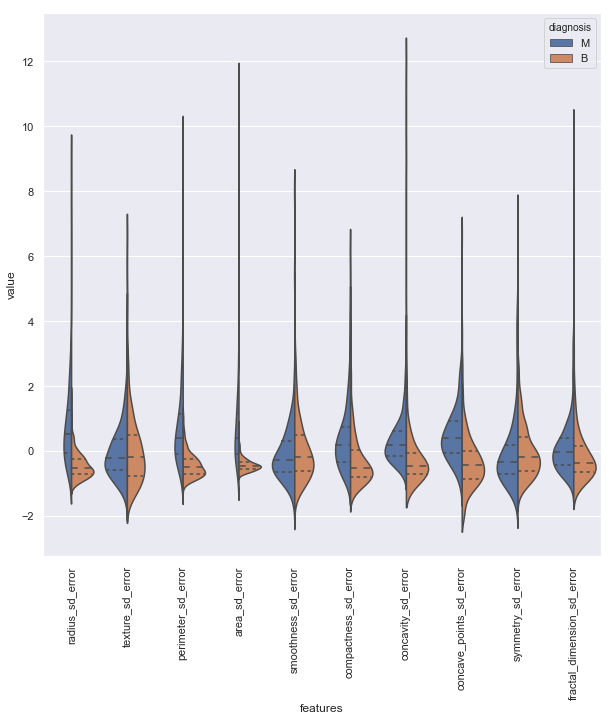

In [19]:
data = pd.concat([y,data_nor[sd_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

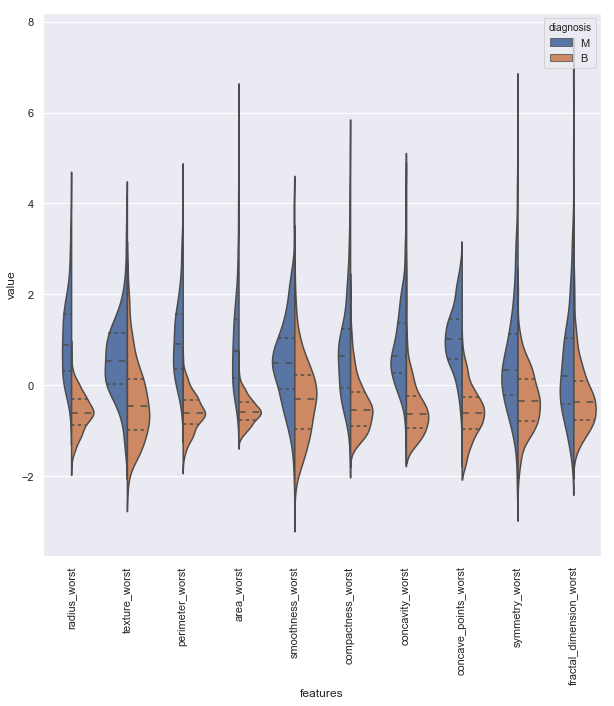

In [20]:
data = pd.concat([y,data_nor[worst_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

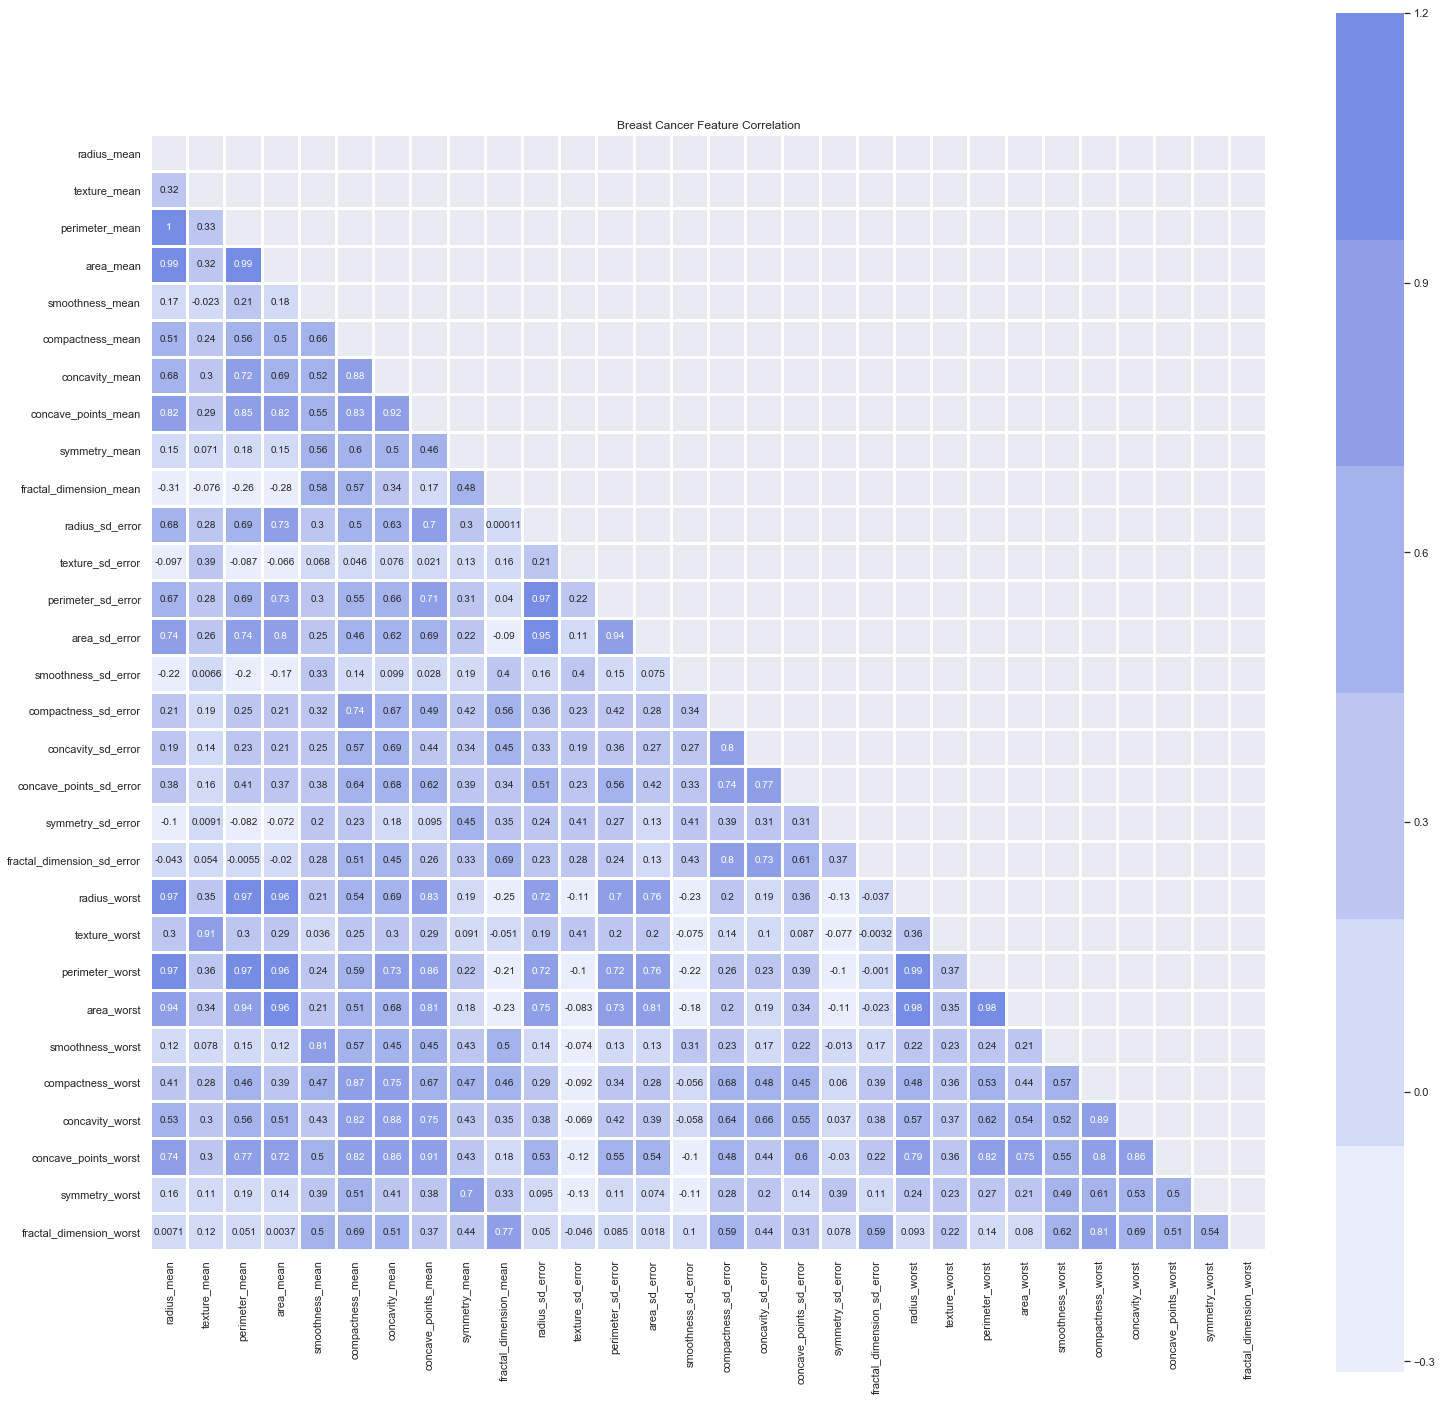

In [21]:
Main_corr = x.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(Main_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
d, ax = plt.subplots(figsize=(25, 25))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(270, 30, as_cmap=True)
cmap=sns.light_palette((260, 75, 60), input="husl")
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Main_corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

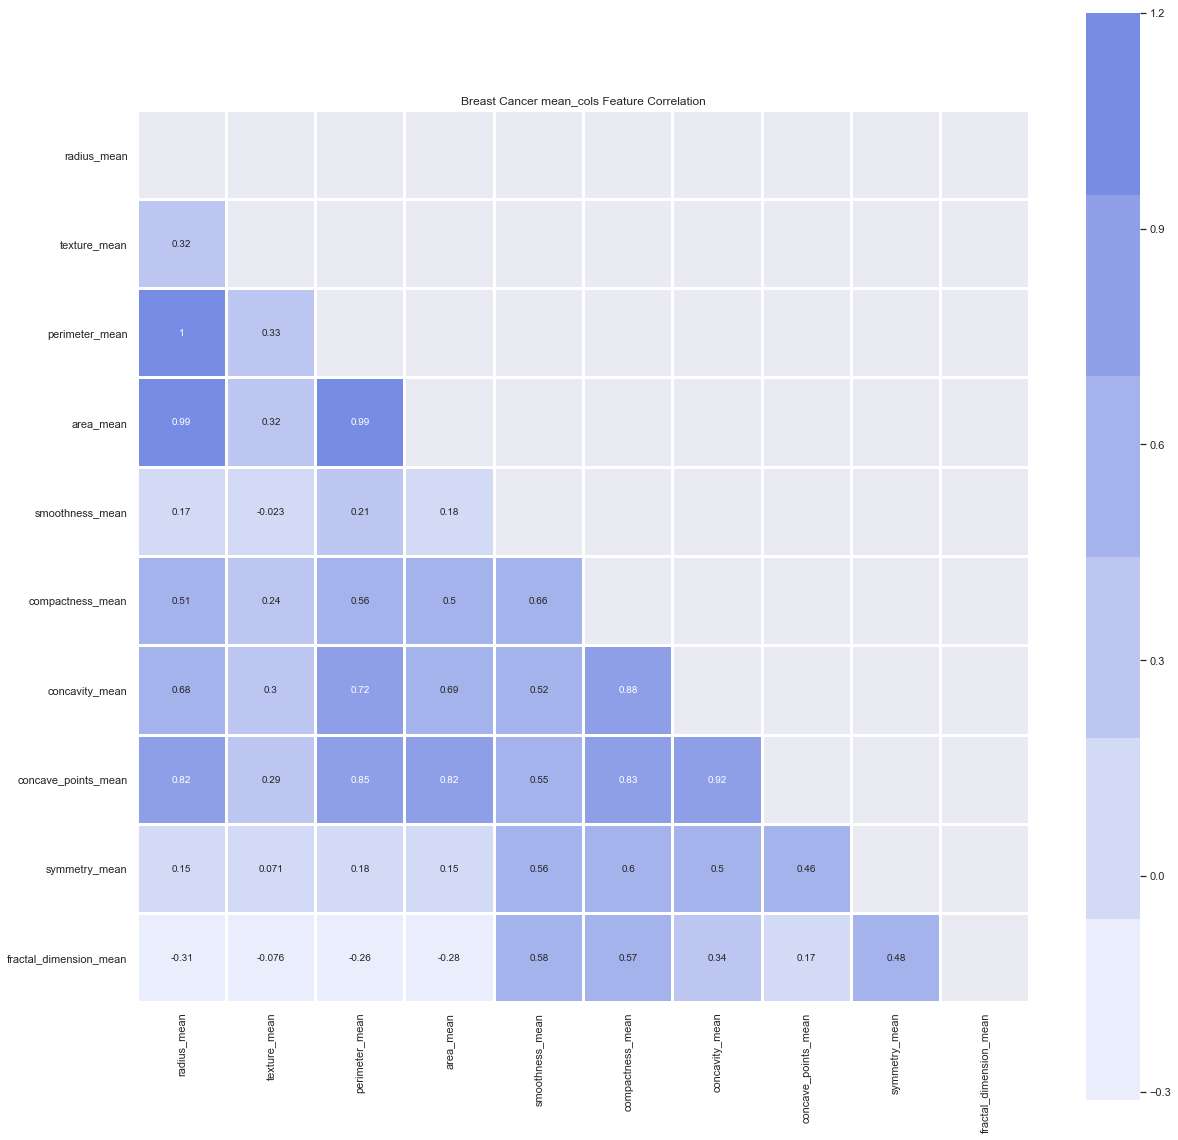

In [22]:
corr = x[mean_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
d, ax = plt.subplots(figsize=(20, 20))
plt.title('Breast Cancer mean_cols Feature Correlation')

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(270, 30, as_cmap=True)
cmap=sns.light_palette((260, 75, 60), input="husl")
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

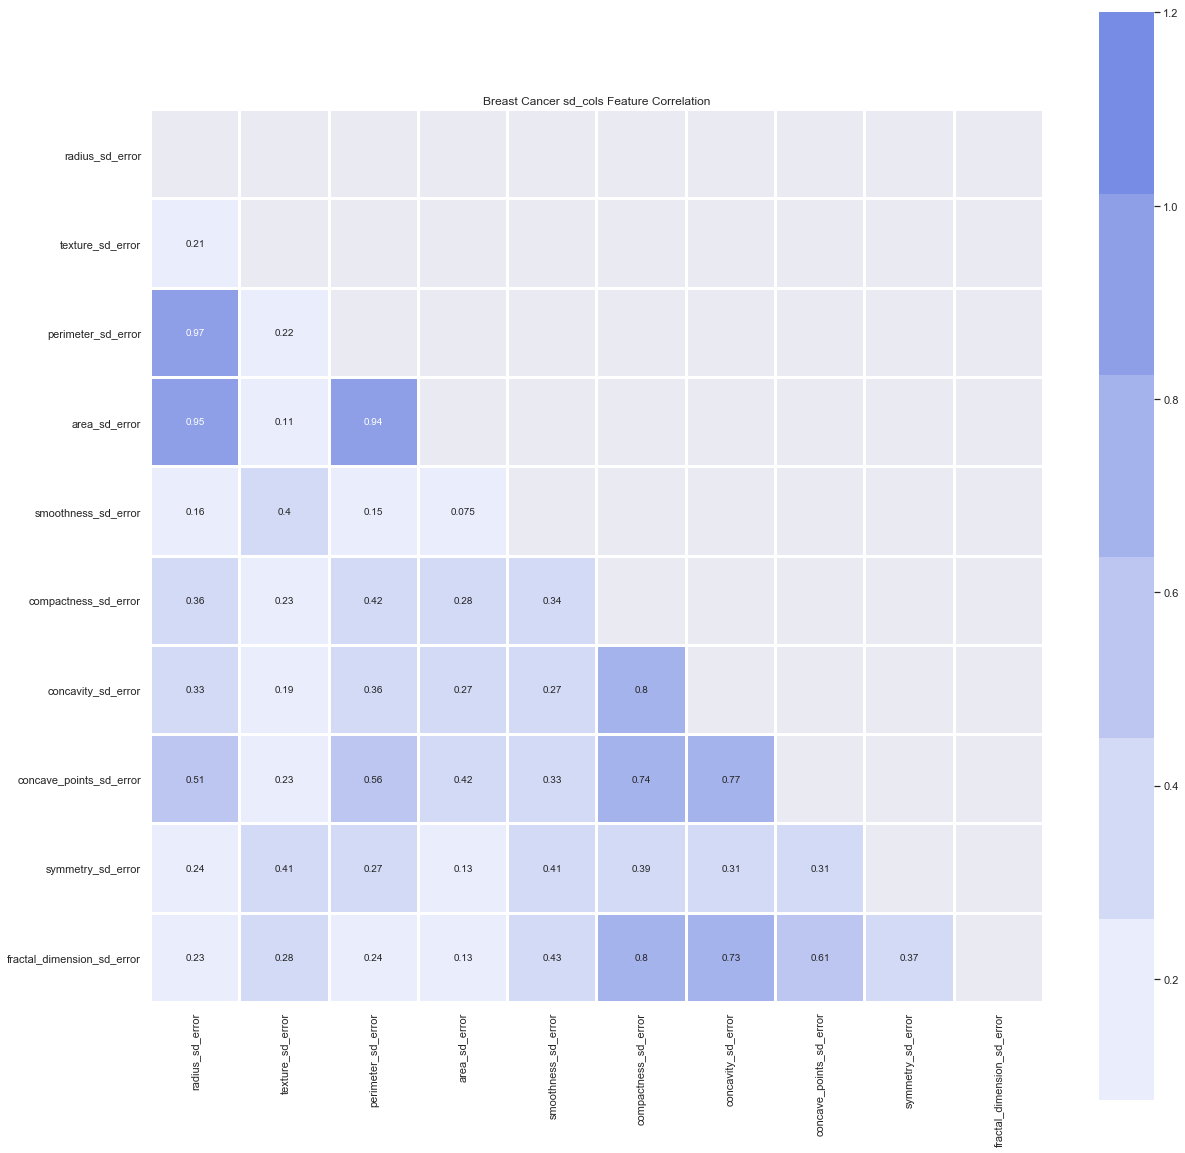

In [23]:

corr = x[sd_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
d, ax = plt.subplots(figsize=(20, 20))
plt.title('Breast Cancer sd_cols Feature Correlation')

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(270, 30, as_cmap=True)
cmap=sns.light_palette((260, 75, 60), input="husl")
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

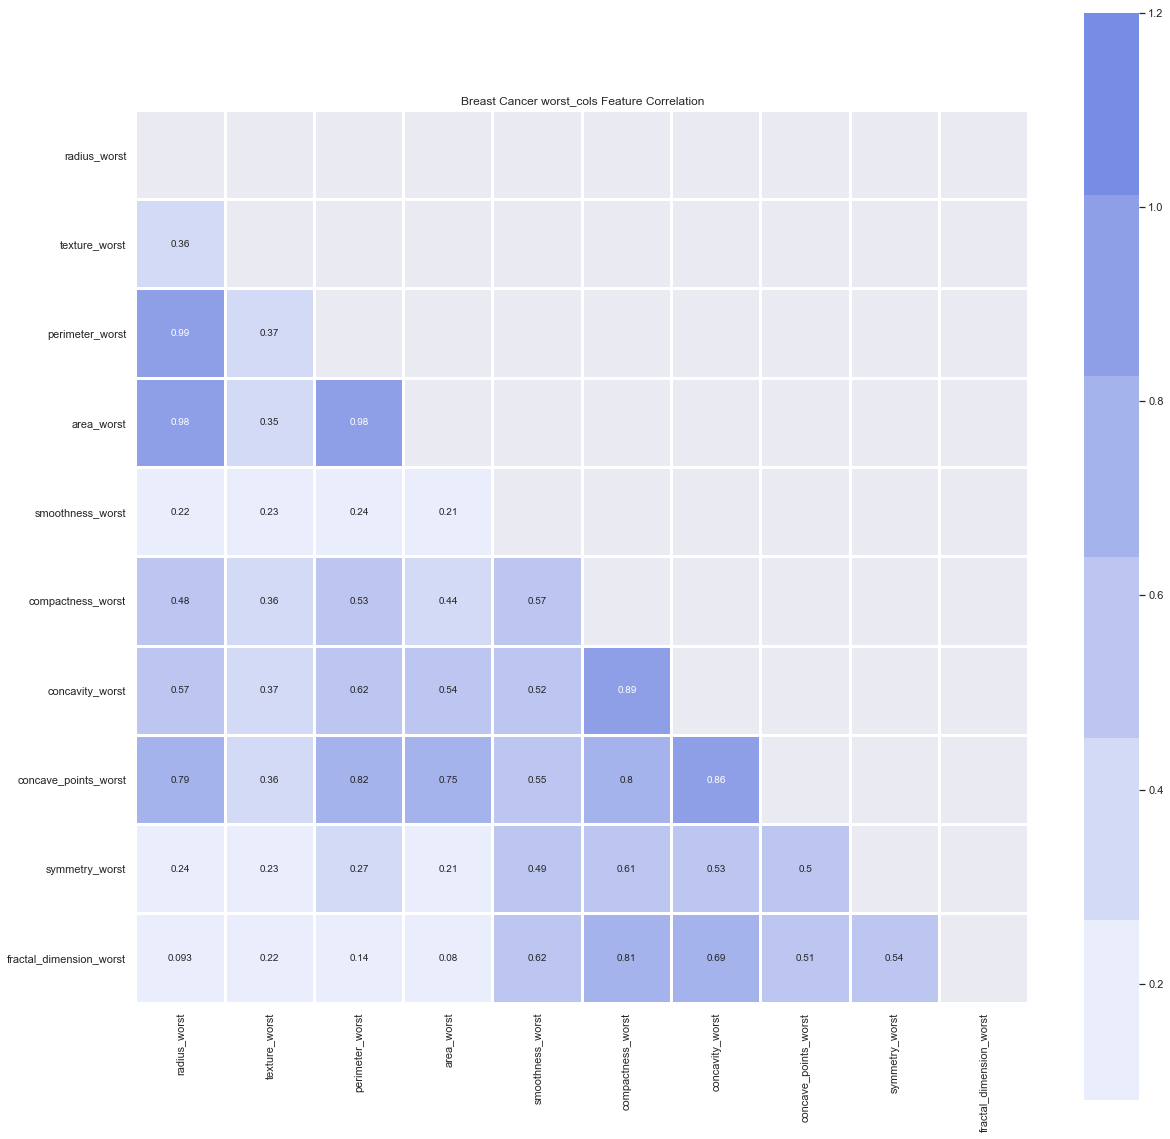

In [24]:
#correlation map
corr = x[worst_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
d, ax = plt.subplots(figsize=(20, 20))
plt.title('Breast Cancer worst_cols Feature Correlation')

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(270, 30, as_cmap=True)
cmap=sns.light_palette((260, 75, 60), input="husl")
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Next, we compare the correlation between features and remove one of two features that have a correlation higher than <b>0.9</b> 

In [25]:
columns = np.full((Main_corr.shape[0],), True, dtype=bool)
for i in range(Main_corr.shape[0]):
    for j in range(i+1, Main_corr.shape[0]):
        if Main_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]
remove_columns = x.columns[columns==False]


In [26]:
len(selected_columns)

20

In [27]:
len(remove_columns) # 10 columns we removed based on Heatmap plot

10

In [28]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
x['diagnosis']=y

In [30]:
x['diagnosis'] = x['diagnosis'].map({'B': 1, 'M': 0}) 


In [31]:
y=x['diagnosis']

In [32]:
x.drop(columns='diagnosis',axis=1,inplace=True)

In [33]:
remove_columns

Index(['perimeter_mean', 'area_mean', 'concave_points_mean',
       'perimeter_sd_error', 'area_sd_error', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concave_points_worst'],
      dtype='object')

<h1>Feature Selection and Classification</h1>

In this Section, we will use 3 feature selection techniques and will test them with 2 Classifiers.

Following Feature Selection Techniques will be used:
    1. Feature Importance
    2. Principal component analysis (PCA)
    3. Feature Selection by using correlation Heatmap

    
In Classifications, we will use following 2 Techniques to train our model and predict:
    1. Random Forest
    2. Support Vector Machine
    
We choose Random Forest because power to handle a large data set with higher dimensionality.
for SVM because ususlly use for two classes.



We gone use F1 performance indicator because better measure of the incorrectly classified cases 

There are few techniques which helps to prevent Overfitting:
1. Cross-validation: In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”)..
2. Train with more data:It won’t work everytime, but training with more data can help algorithms detect the signal better. Of course, that’s not always the case. If we just add more noisy data, this technique won’t help.
3. Remove features: Some algorithms have built-in feature selection. For those that don’t, we can manually improve their generalizability by removing irrelevant input features.



<h2>1. Feature Importance</h2>


You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 15 features for the dataset.

[0.05487484 0.02225481 0.07551025 0.03703795 0.00831599 0.02626359
 0.04578224 0.07812613 0.00757369 0.00600447 0.02547386 0.00560773
 0.02236431 0.0306315  0.00759418 0.00935    0.00724131 0.01371741
 0.00508765 0.00461677 0.10028313 0.02601946 0.0750301  0.07850297
 0.02449357 0.0263085  0.04980619 0.10477165 0.01286382 0.00849193]


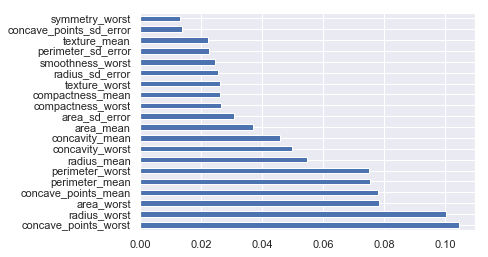

In [34]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [35]:
feat_importances.nlargest(15).keys()

Index(['concave_points_worst', 'radius_worst', 'area_worst',
       'concave_points_mean', 'perimeter_mean', 'perimeter_worst',
       'radius_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
       'area_sd_error', 'compactness_worst', 'compactness_mean',
       'texture_worst', 'radius_sd_error'],
      dtype='object')

In [36]:
feat_importances.keys()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_sd_error', 'texture_sd_error', 'perimeter_sd_error',
       'area_sd_error', 'smoothness_sd_error', 'compactness_sd_error',
       'concavity_sd_error', 'concave_points_sd_error', 'symmetry_sd_error',
       'fractal_dimension_sd_error', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
x_1=x[feat_importances.nlargest(20).keys()]

<h2>1.1 Random Forsest</h2>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Random Forsest Accuracy is Training Data:  1.0


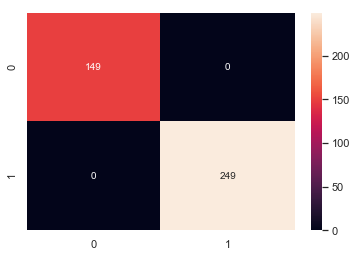

In [39]:


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#Random forest classifier with n_estimators=10 (default)
model = RandomForestClassifier(random_state=43)      
model = model.fit(x_train,y_train)

ac = accuracy_score(y_train,model.predict(x_train))
print('Random Forsest Accuracy is Training Data: ',ac)

cm = confusion_matrix(y_train,model.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")


Random Forsest Accuracy on Test Data: 0.9707602339181286 , F1 : 0.9769585253456222

2-fold cross-validation:
[0.94736842 0.95422535]
The average accuracy of the Random Forest classifier is : 0.95


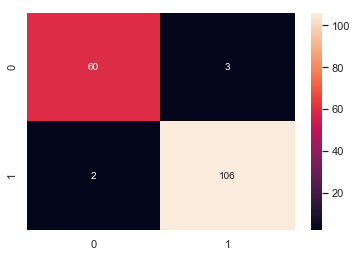

In [40]:
predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)
print('Random Forsest Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))
#do a 2 fold cross-validation 
results_RF = cross_val_score(model, x,y, cv=2)
print("\n2-fold cross-validation:")
print(results_RF)
print("The average accuracy of the Random Forest classifier is : %.2f" % np.mean(results_RF))




cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt="d")

The accuracy on Training Data is 100% and 96.5% and F1 is 97.7% on Test Data. We can see in confusion matrix that it has made few wrong predictions. Not bad, right!...

<h2>About the Overfit</h2>

Moreover, Accuracy gap between training and testing dataset is not wide, so <b> our model isn't overfitting</b>. <br>
If our model does much better on the training set than on the test set, then we’re likely overfitting.Second point we use 2-Cross-validation to prevent overfitting.

Lets test these features with SVM classifier.
<h2>1.2 Support Vector Machine Classification</h2>

Support Vector Machine  Accuracy on Test Data: 0.935672514619883 , F1 : 0.9515418502202644

2-fold cross-validation:
[0.87368421 0.94014085]
The average accuracy of the SVM classifier is : 0.91


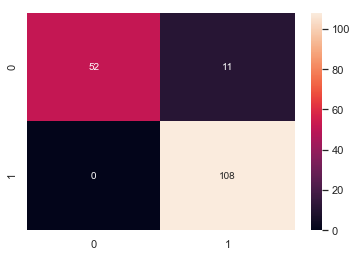

In [41]:
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

model = svm.SVC()
model.fit(x_train,y_train)
#prediction=model.predict(x_test)
#metrics.accuracy_score(prediction,y_test)
predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

#do a 2 fold cross-validation 
results_svm = cross_val_score(model, x,y, cv=2)
print("\n2-fold cross-validation:")
print(results_svm)
print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

F1 is 95.1%, not good as compare to Random Forest model.
let's optimize the SVM to find better results.


Support Vector Machine  Accuracy on Test Data: 0.9649122807017544 , F1 : 0.9722222222222222

2-fold cross-validation:
[0.94035088 0.93661972]
The average accuracy of the SVM classifier is : 0.94


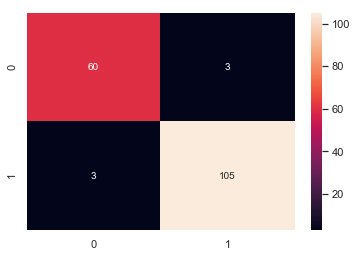

In [42]:
model = svm.SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

#do a 2 fold cross-validation 
results_svm = cross_val_score(model, x,y, cv=2)
print("\n2-fold cross-validation:")
print(results_svm)
print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

F1 is 97.2%, less than Random Forest model.

Now, lets test other feature selection methods if we could find better results.

<h2>2. Principal component analysis (PCA)</h2>
Principal component analysis (PCA) is a technique for reducing the dimensionality https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [46]:
x1=[]
y1=[]
for i in range(20,5,-1):
    pca = PCA(n_components=i)
    train1 = pca.fit_transform(x)
    x1.append(np.sum(pca.explained_variance_ratio_))
    y1.append(i)

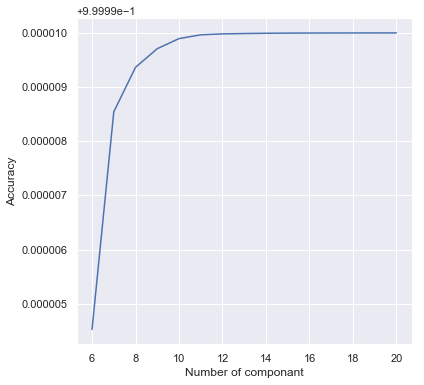

In [47]:
plt.figure(figsize=(6, 6))
s=sns.lineplot(y1,x1)
s.set(xlabel="Number of componant",
ylabel="Accuracy")

plt.show()

As shown on the last figure 11 componant give us high accuracy. We adopt this number

In [48]:
pca = PCA(n_components=11)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

<h2>2.1 Random Forest Classification</h2>

Random Forsest Accuracy on Test Data: 0.9415204678362573 , F1 : 0.9537037037037037


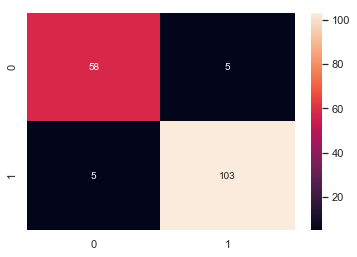

In [49]:

#Random forest classifier with n_estimators=10 (default)
model = RandomForestClassifier(random_state=43)      
model = model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)
print('Random Forsest Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

cm_2 = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm_2,annot=True,fmt="d")

<h2>2.2 Suport Vector Machine</h2>

Support Vector Machine  Accuracy on Test Data: 0.9649122807017544 , F1 : 0.9724770642201834


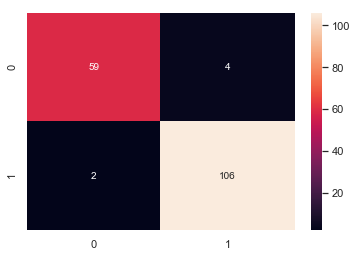

In [50]:
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

model = svm.SVC()
model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Support Vector Machine  Accuracy on Test Data: 0.9766081871345029 , F1 : 0.981651376146789


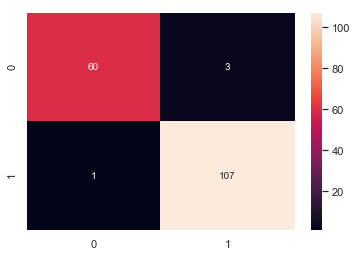

In [51]:
model = svm.SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))


cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 98.1%,
I think that <b>really good</b> because we get high Accuracy with less than half of the features on the original data set.


<h2>3. Feature Selection by using Correlation Heatmap</h2>

As it can be seen in map heat figure : 'perimeter_mean','area_mean','concave_points_mean','perimeter_sd_error','area_sd_error','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst' and 'concave_points_worst'are highly correlated.That why we remove it.

In [52]:
remove_columns.tolist()

['perimeter_mean',
 'area_mean',
 'concave_points_mean',
 'perimeter_sd_error',
 'area_sd_error',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave_points_worst']

In [53]:
drop_list1 =remove_columns.tolist()
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.shape

(569, 20)

In [54]:
x.shape

(569, 30)

In [55]:
# # split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)


<h2>3.1 Random Forest Classification</h2>

Random Forsest Accuracy on Test Data: 0.9766081871345029 , F1 : 0.981651376146789


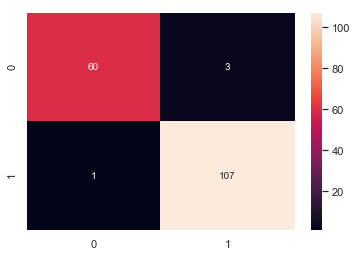

In [56]:

#random forest classifier with n_estimators=10 (default)
model = RandomForestClassifier(random_state=43)      
model = model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)
print('Random Forsest Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

cm_2 = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm_2,annot=True,fmt="d")

<b>As shown on the previous figure. We have the same F1 that we got it, but with 20 features PCA, we get the same F1 with 11 features ;).</b>. 

<h2>3.2 Suport Vector Machine</h2>

Support Vector Machine  Accuracy on Test Data: 0.8947368421052632 , F1 : 0.9203539823008849


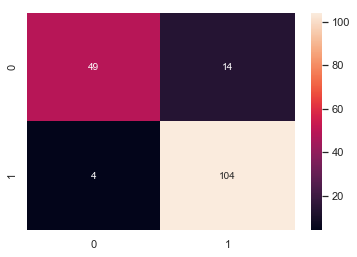

In [57]:
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

model = svm.SVC()
model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

SVM Accuracy is 89%, which is worsted. 


Support Vector Machine  Accuracy on Test Data: 0.9473684210526315 , F1 : 0.9589041095890412


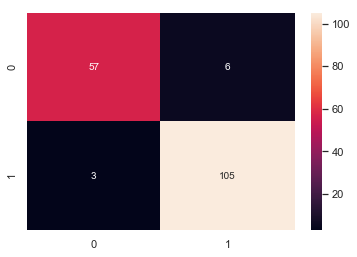

In [58]:
model = svm.SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
model.fit(x_train,y_train)

predict=model.predict(x_test)
ac = accuracy_score(y_test,predict)

print('Support Vector Machine  Accuracy on Test Data:',ac,", F1 :",f1_score(y_test,predict))

cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## 4. Deep Learning

---
### Activation Functions:
**relu**
<br> The vanishing gradient problem: the gradients of some activation functions becoming increasingly smaller as the number of hidden layers increases. This is problematic because the parameters in the neural network won't be tuned effectively.
<br>ReLU overcomes this problem. Formula:
$R(x) = 
 \begin{Bmatrix}
  x & x > 0 \\
  0 & x <= 0 
 \end{Bmatrix}$<br>
 
Since the ReLU has a range of [0, $\infty$], gradients won't diminish.

**sigmoid**
<br>Activation function used in the output layer. Effective for classification problems. Formula:
$S(x) = \LARGE\frac{1}{1+e^{-x}}$

---

### Loss Function:
**Binary Crossentropy**
<br>Cross entropy is calculated by finding the predicted probability (the probability of classification being correct based on given data). Larger predicted probabilities yeild lower losses. Formula:
$Loss = -(ylog(p)+(1-y) log(1-p))$
<br>y: whether or not classification was correct
<br>p: predicted probability

The only difference between the cross entropy and binary cross entropy loss functions is that binary cross entropy includes a sigmoid activation function.

---
### Optmization Function:
**Adam Optmizier**
<br> Calculates adaptive learning rates for each parameter. First computes exponentially weighted average of:
1. past gradients
2. past square gradients

This gives us the mean, and variance of the gradients. These averages have a bias towards 0, so after the bias is corrected, the parameters are updated.

---

### Deep Learning with PCA

In [59]:
x_1.shape

(569, 20)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
pca = PCA(n_components=11)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [78]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [80]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (11,) ))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
batch_size = 32
model.fit(x_train,y_train,batch_size=batch_size,
         epochs=7,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=1)

Train on 398 samples, validate on 171 samples
Epoch 1/7
398/398 [==============================] - 0s 1ms/sample - loss: 0.4672 - accuracy: 0.7915 - val_loss: 0.1766 - val_accuracy: 0.9240
Epoch 2/7
398/398 [==============================] - 0s 93us/sample - loss: 0.1871 - accuracy: 0.9422 - val_loss: 0.0872 - val_accuracy: 0.9591
Epoch 3/7
398/398 [==============================] - 0s 90us/sample - loss: 0.1087 - accuracy: 0.9648 - val_loss: 0.0786 - val_accuracy: 0.9649
Epoch 4/7
398/398 [==============================] - 0s 85us/sample - loss: 0.1050 - accuracy: 0.9623 - val_loss: 0.0778 - val_accuracy: 0.9532
Epoch 5/7
398/398 [==============================] - 0s 88us/sample - loss: 0.0766 - accuracy: 0.9824 - val_loss: 0.0698 - val_accuracy: 0.9649
Epoch 6/7
398/398 [==============================] - 0s 88us/sample - loss: 0.0911 - accuracy: 0.9724 - val_loss: 0.0687 - val_accuracy: 0.9591
Epoch 7/7
398/398 [==============================] - 0s 88us/sample - loss: 0.0574 - accura

In [82]:
score[1]

0.9649123

<h2>Short summary of analysis, explaining how model works and how it performs</h2>

The data is almost normally distributed and it's not skewed. 37% of variables are highly correlated and have similar affect on data.

As we have tested 2 models with 3 feature selection techniques and Random Forest worked best with Feature Importance using Extra Tree Classified feature selection in our case with 20 features.SVM with PCA show the same accuracy but with 11 features and that we will use as our final model.Both of them achived on F1 98.1% 

finally, we use a neural network that achieved 96.5%, not bad accuracy. Right !!.

The data is divided into training(70%) and testing(30%) and Random forest model scored well with the testing dataset.